In [ ]:
#Test variant
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры задачи
gamma_d = 0.1      # скорость релаксации "горячих" экситонов
kappa_c = 0.1      # коэффициент взаимодействия
kappa_ex = 0.1     # коэффициент экситонного затухания
N0 = [1,2,3,4,5]            # начальная концентрация горячих экситонов
ne_0 = 1.9         # начальная концентрация электронов
nh_0 = 1.4         # начальная концентрация дырок

# Функция для расчета производных
def model(t, y, N0, gamma_d, kappa_c, kappa_ex):
    ne, nh, nx = y
    n_hot_x = N0 * np.exp(-gamma_d * t)  # Уравнение (10)
    dne_dt = gamma_d * n_hot_x - kappa_ex * ne * nh  # Уравнение (11)
    dnh_dt = dne_dt
    dnx_dt = kappa_ex * ne * nh - kappa_c * nx * (ne + nh)  # Уравнение (12)
    
    return [dne_dt, dnh_dt, dnx_dt]

# Временной массив
t_span = (0, 100)  # от 0 до 100 с
t_eval = np.linspace(0, 100, 500)  # временные точки для оценки

# Начальные условия
y0 = [ne_0, nh_0, 0]  # ne(концентрация е), nh(концентрация дырок), nx(концентрация экситонов)
for i in range(len(N0)):
    # Интеграция уравнений
    result = solve_ivp(model, t_span, y0, args=(N0[i], gamma_d, kappa_c, kappa_ex), t_eval=t_eval)
    
    # Извлечение результатов
    ne, nh, nx = result.y
    n_hot_x = N0[i] * np.exp(-gamma_d * result.t)

    # Построение графиков
    plt.figure(figsize=(12, 8))
    #plt.plot(result.t, n_hot_x, label='n_hot_x (горячие экситоны)', color='orange')
    plt.plot(result.t, ne, label='ne (электроны)', color='blue')
    plt.plot(result.t, nh, label='nh (дырки)', color='red')
    #plt.plot(result.t, nx, label='nx (экситоны)', color='green')
    plt.title('Динамика концентраций носителей и экситонов во времени')
    plt.xlabel('Время (t)')
    plt.ylabel('Концентрация')
    plt.legend()
    plt.grid()
    plt.xlim(0, 50)
    plt.ylim(0, 3)
    plt.show()

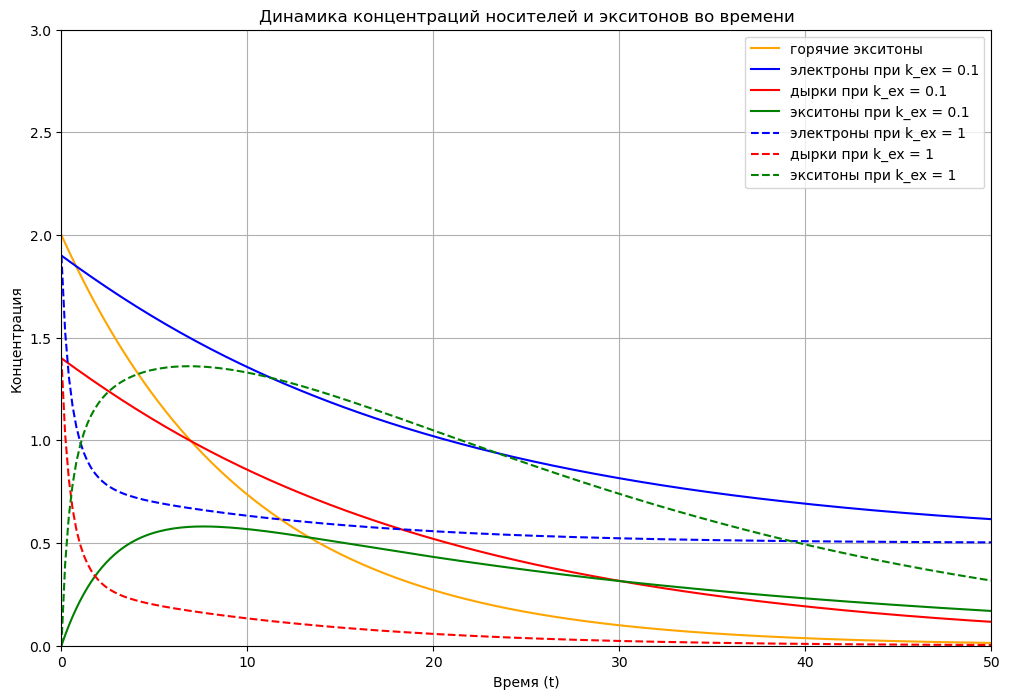

In [38]:
#Через solve_ivp (Different k_ex)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры задачи
gamma_d = 0.1      # скорость релаксации "горячих" экситонов
kappa_c = 0.1       # коэффициент взаимодействия
kappa_ex = [0.1,1]     # коэффициент экситонного затухания
N0 = 2            # начальная концентрация горячих экситонов
ne_0 = 1.9         # начальная концентрация электронов
nh_0 = 1.4         # начальная концентрация дырок

# Функция для расчета производных
def model(t, y, N0, gamma_d, kappa_c, kappa_ex):
    ne, nh, nx = y
    n_hot_x = N0 * np.exp(-gamma_d * t)  # Уравнение (10)
    dne_dt = gamma_d * n_hot_x - kappa_ex * ne * nh  # Уравнение (11)
    dnh_dt = dne_dt
    dnx_dt = kappa_ex * ne * nh - kappa_c * nx * (ne + nh)  # Уравнение (12)
    
    return [dne_dt, dnh_dt, dnx_dt]

# Временной массив
t_span = (0, 100)  # от 0 до 100 с
t_eval = np.linspace(0, 100, 500)  # временные точки для оценки

# Начальные условия
y0 = [ne_0, nh_0, 0]  # ne(концентрация е), nh(концентрация дырок), nx(концентрация экситонов)
#набор решений
res_x = []
for i in range(len(kappa_ex)):
    # Интеграция уравнений
    result = solve_ivp(model, t_span, y0, args=(N0, gamma_d, kappa_c, kappa_ex[i]), t_eval=t_eval)
    res_x.append(result)
    
# Извлечение результатов
ne, nh, nx = res_x[0].y
n_hot_x = N0 * np.exp(-gamma_d * res_x[0].t)

# Извлечение результатов с измененным параметром 
ne1, nh1, nx1 = res_x[1].y
n_hot_x1 = N0 * np.exp(-gamma_d * res_x[1].t) 
# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(res_x[0].t, n_hot_x, label='горячие экситоны', color='orange',linestyle='-')
plt.plot(res_x[0].t, ne, label='электроны при k_ex = 0.1', color='b',linestyle='-')
plt.plot(res_x[0].t, nh, label='дырки при k_ex = 0.1', color='r',linestyle='-')
plt.plot(res_x[0].t, nx, label='экситоны при k_ex = 0.1', color='g',linestyle='-')


# Построение графиков с изменненным параметром
#plt.plot(res_x[1].t, n_hot_x1, label='n_hot_x (горячие экситоны)', color='orange',linestyle='-')
plt.plot(res_x[1].t, ne1, label='электроны при k_ex = 1', color='blue',linestyle='--')
plt.plot(res_x[1].t, nh1, label='дырки при k_ex = 1', color='red',linestyle='--')
plt.plot(res_x[1].t, nx1, label='экситоны при k_ex = 1', color='green',linestyle='--')
plt.title('Динамика концентраций носителей и экситонов во времени')
plt.xlabel('Время (t)')
plt.ylabel('Концентрация')
plt.legend()
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 3)
plt.show()

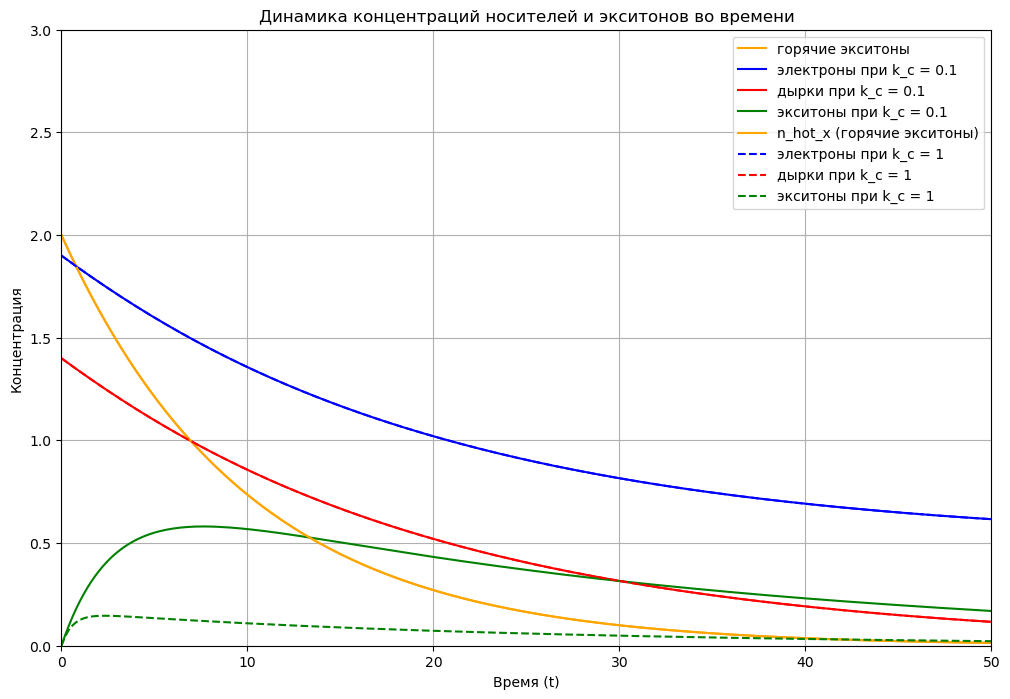

In [30]:
#Через solve_ivp (Different k_с)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры задачи
gamma_d = 0.1      # скорость релаксации "горячих" экситонов
kappa_c = [0.1,0.5]       # коэффициент взаимодействия
kappa_ex = 0.1     # коэффициент экситонного затухания
N0 = 2            # начальная концентрация горячих экситонов
ne_0 = 1.9         # начальная концентрация электронов
nh_0 = 1.4         # начальная концентрация дырок

# Функция для расчета производных
def model(t, y, N0, gamma_d, kappa_c, kappa_ex):
    ne, nh, nx = y
    n_hot_x = N0 * np.exp(-gamma_d * t)  # Уравнение (10)
    dne_dt = gamma_d * n_hot_x - kappa_ex * ne * nh  # Уравнение (11)
    dnh_dt = dne_dt
    dnx_dt = kappa_ex * ne * nh - kappa_c * nx * (ne + nh)  # Уравнение (12)
    
    return [dne_dt, dnh_dt, dnx_dt]

# Временной массив
t_span = (0, 100)  # от 0 до 100 с
t_eval = np.linspace(0, 100, 500)  # временные точки для оценки

# Начальные условия
y0 = [ne_0, nh_0, 0]  # ne(концентрация е), nh(концентрация дырок), nx(концентрация экситонов)
#набор решений
res_x = []
for i in range(len(kappa_c)):
    # Интеграция уравнений
    result = solve_ivp(model, t_span, y0, args=(N0, gamma_d, kappa_c[i], kappa_ex), t_eval=t_eval)
    res_x.append(result)
    
# Извлечение результатов
ne, nh, nx = res_x[0].y
n_hot_x = N0 * np.exp(-gamma_d * res_x[0].t)

# Извлечение результатов с измененным параметром 
ne1, nh1, nx1 = res_x[1].y
n_hot_x1 = N0 * np.exp(-gamma_d * res_x[1].t) 
# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(res_x[0].t, n_hot_x, label='горячие экситоны', color='orange',linestyle='-')
plt.plot(res_x[0].t, ne, label='электроны при k_c = 0.1', color='b',linestyle='-')
plt.plot(res_x[0].t, nh, label='дырки при k_c = 0.1', color='r',linestyle='-')
plt.plot(res_x[0].t, nx, label='экситоны при k_c = 0.1', color='g',linestyle='-')


# Построение графиков с изменненным параметром
plt.plot(res_x[1].t, n_hot_x1, label='n_hot_x (горячие экситоны)', color='orange',linestyle='--')
plt.plot(res_x[1].t, ne1, label='электроны при k_c = 1', color='blue',linestyle='--')
plt.plot(res_x[1].t, nh1, label='дырки при k_c = 1', color='red',linestyle='--')
plt.plot(res_x[1].t, nx1, label='экситоны при k_c = 1', color='green',linestyle='--')
plt.title('Динамика концентраций носителей и экситонов во времени')
plt.xlabel('Время (t)')
plt.ylabel('Концентрация')
plt.legend()
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 3)
plt.show()

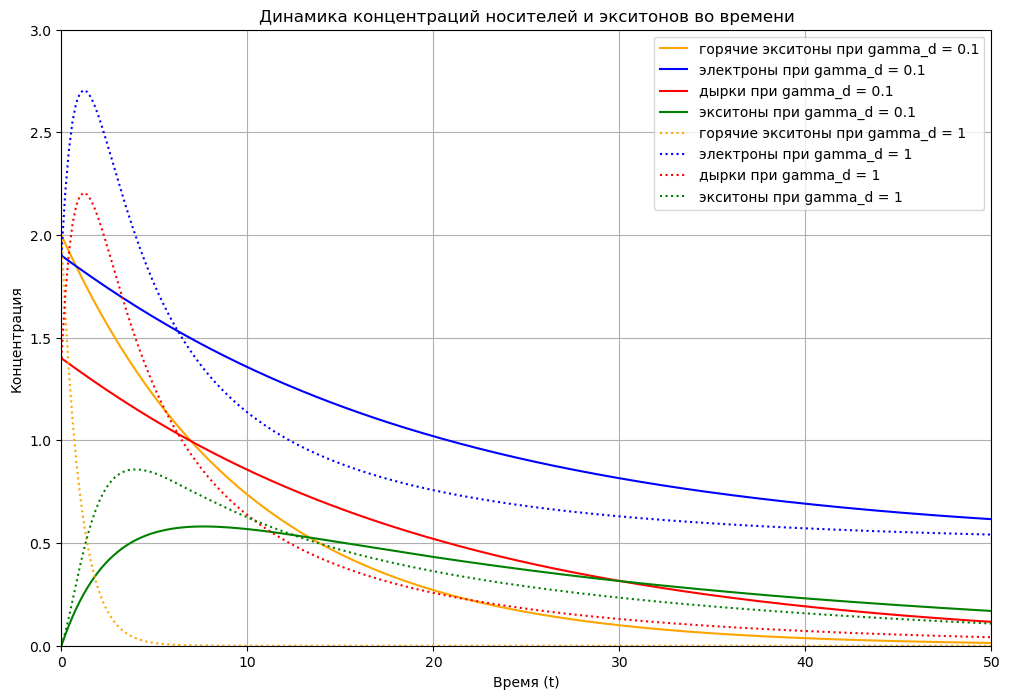

In [40]:
#Через solve_ivp (Different gamma_d)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры задачи
gamma_d = [0.1,1]      # скорость релаксации "горячих" экситонов
kappa_c = 0.1       # коэффициент взаимодействия
kappa_ex = 0.1     # коэффициент экситонного затухания
N0 = 2            # начальная концентрация горячих экситонов
ne_0 = 1.9         # начальная концентрация электронов
nh_0 = 1.4         # начальная концентрация дырок

# Функция для расчета производных
def model(t, y, N0, gamma_d, kappa_c, kappa_ex):
    ne, nh, nx = y
    n_hot_x = N0 * np.exp(-gamma_d * t)  # Уравнение (10)
    dne_dt = gamma_d * n_hot_x - kappa_ex * ne * nh  # Уравнение (11)
    dnh_dt = dne_dt
    dnx_dt = kappa_ex * ne * nh - kappa_c * nx * (ne + nh)  # Уравнение (12)
    
    return [dne_dt, dnh_dt, dnx_dt]

# Временной массив
t_span = (0, 100)  # от 0 до 100 с
t_eval = np.linspace(0, 100, 500)  # временные точки для оценки

# Начальные условия
y0 = [ne_0, nh_0, 0]  # ne(концентрация е), nh(концентрация дырок), nx(концентрация экситонов)
#набор решений
res_x = []
for i in range(len(gamma_d)):
    # Интеграция уравнений
    result = solve_ivp(model, t_span, y0, args=(N0, gamma_d[i], kappa_c, kappa_ex), t_eval=t_eval)
    res_x.append(result)
    
# Извлечение результатов
ne, nh, nx = res_x[0].y
n_hot_x = N0 * np.exp(-gamma_d[0] * res_x[0].t)

# Извлечение результатов с измененным параметром 
ne1, nh1, nx1 = res_x[1].y
n_hot_x1 = N0 * np.exp(-gamma_d[1] * res_x[1].t) 
# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(res_x[0].t, n_hot_x, label='горячие экситоны при gamma_d = 0.1', color='orange',linestyle='-')
plt.plot(res_x[0].t, ne, label='электроны при gamma_d = 0.1', color='b',linestyle='-')
plt.plot(res_x[0].t, nh, label='дырки при gamma_d = 0.1', color='r',linestyle='-')
plt.plot(res_x[0].t, nx, label='экситоны при gamma_d = 0.1', color='g',linestyle='-')


# Построение графиков с изменненным параметром
plt.plot(res_x[1].t, n_hot_x1, label='горячие экситоны при gamma_d = 1', color='orange',linestyle=':')
plt.plot(res_x[1].t, ne1, label='электроны при gamma_d = 1', color='blue',linestyle=':')
plt.plot(res_x[1].t, nh1, label='дырки при gamma_d = 1', color='red',linestyle=':')
plt.plot(res_x[1].t, nx1, label='экситоны при gamma_d = 1', color='green',linestyle=':')
plt.title('Динамика концентраций носителей и экситонов во времени')
plt.xlabel('Время (t)')
plt.ylabel('Концентрация')
plt.legend()
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 3)
plt.show()

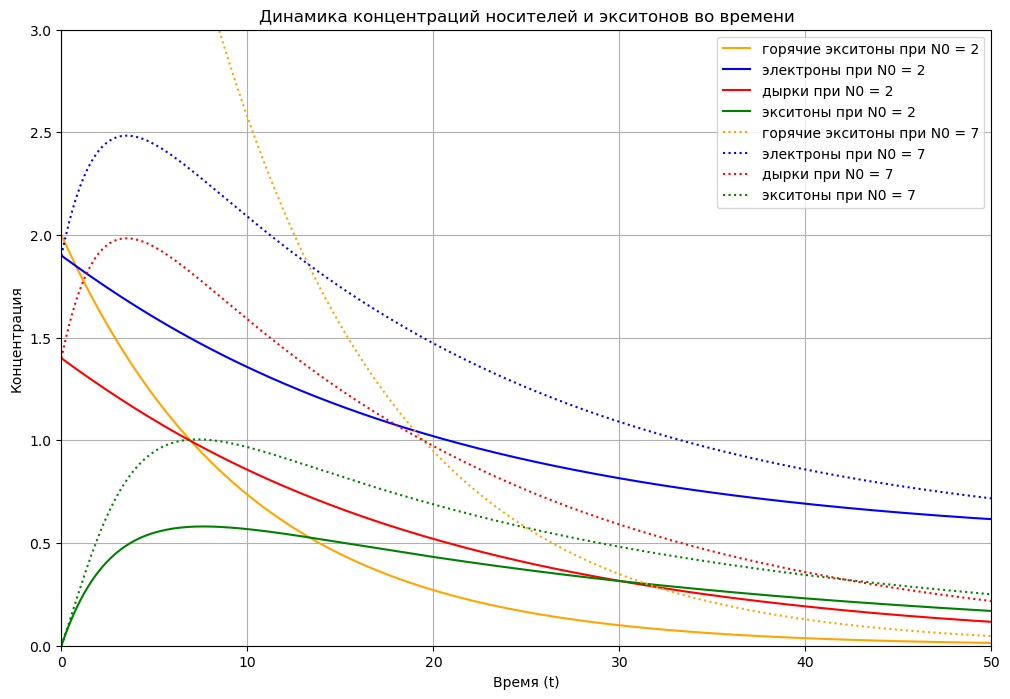

In [42]:
#Через solve_ivp (Different N0)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры задачи
gamma_d = 0.1      # скорость релаксации "горячих" экситонов
kappa_c = 0.1       # коэффициент взаимодействия
kappa_ex = 0.1     # коэффициент экситонного затухания
N0 = [2,7]            # начальная концентрация горячих экситонов
ne_0 = 1.9         # начальная концентрация электронов
nh_0 = 1.4         # начальная концентрация дырок

# Функция для расчета производных
def model(t, y, N0, gamma_d, kappa_c, kappa_ex):
    ne, nh, nx = y
    n_hot_x = N0 * np.exp(-gamma_d * t)  # Уравнение (10)
    dne_dt = gamma_d * n_hot_x - kappa_ex * ne * nh  # Уравнение (11)
    dnh_dt = dne_dt
    dnx_dt = kappa_ex * ne * nh - kappa_c * nx * (ne + nh)  # Уравнение (12)
    
    return [dne_dt, dnh_dt, dnx_dt]

# Временной массив
t_span = (0, 100)  # от 0 до 100 с
t_eval = np.linspace(0, 100, 500)  # временные точки для оценки

# Начальные условия
y0 = [ne_0, nh_0, 0]  # ne(концентрация е), nh(концентрация дырок), nx(концентрация экситонов)
#набор решений
res_x = []
for i in range(len(N0)):
    # Интеграция уравнений
    result = solve_ivp(model, t_span, y0, args=(N0[i], gamma_d, kappa_c, kappa_ex), t_eval=t_eval)
    res_x.append(result)
    
# Извлечение результатов
ne, nh, nx = res_x[0].y
n_hot_x = N0[0] * np.exp(-gamma_d * res_x[0].t)

# Извлечение результатов с измененным параметром 
ne1, nh1, nx1 = res_x[1].y
n_hot_x1 = N0[1] * np.exp(-gamma_d * res_x[1].t) 
# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(res_x[0].t, n_hot_x, label='горячие экситоны при N0 = 2', color='orange',linestyle='-')
plt.plot(res_x[0].t, ne, label='электроны при N0 = 2', color='b',linestyle='-')
plt.plot(res_x[0].t, nh, label='дырки при N0 = 2', color='r',linestyle='-')
plt.plot(res_x[0].t, nx, label='экситоны при N0 = 2', color='g',linestyle='-')


# Построение графиков с изменненным параметром
plt.plot(res_x[1].t, n_hot_x1, label='горячие экситоны при N0 = 7', color='orange',linestyle=':')
plt.plot(res_x[1].t, ne1, label='электроны при N0 = 7', color='blue',linestyle=':')
plt.plot(res_x[1].t, nh1, label='дырки при N0 = 7', color='red',linestyle=':')
plt.plot(res_x[1].t, nx1, label='экситоны при N0 = 7', color='green',linestyle=':')
plt.title('Динамика концентраций носителей и экситонов во времени')
plt.xlabel('Время (t)')
plt.ylabel('Концентрация')
plt.legend()
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 3)
plt.show()

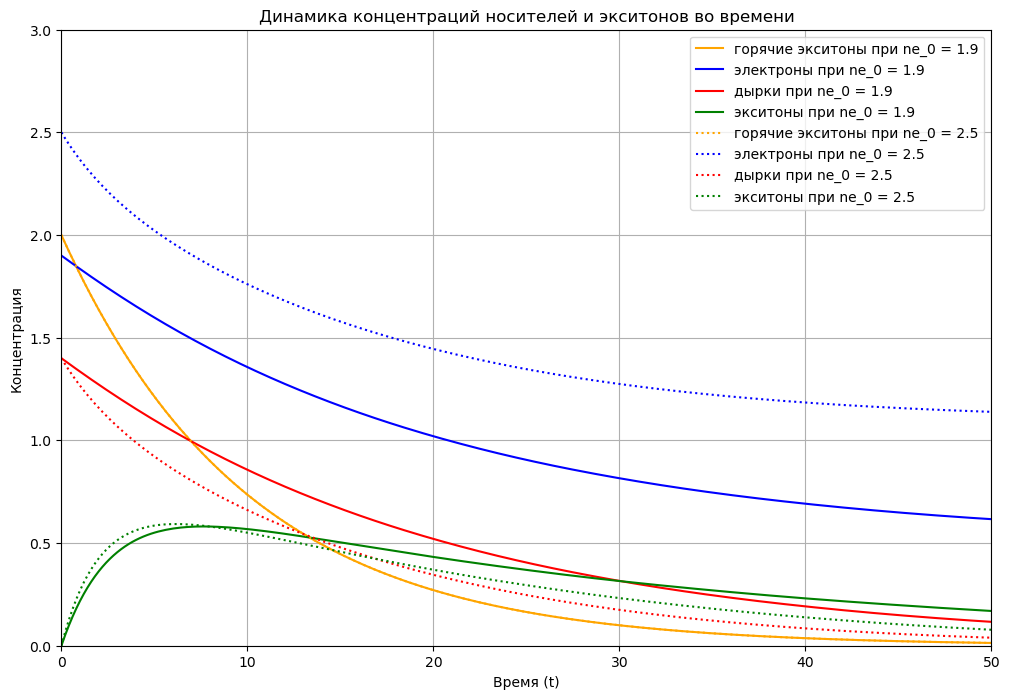

In [51]:
#Через solve_ivp (Different ne_0)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры задачи
gamma_d = 0.1      # скорость релаксации "горячих" экситонов
kappa_c = 0.1       # коэффициент взаимодействия
kappa_ex = 0.1     # коэффициент экситонного затухания
N0 = 2            # начальная концентрация горячих экситонов
ne_0 = [1.9,2.5]         # начальная концентрация электронов
nh_0 = 1.4         # начальная концентрация дырок

# Функция для расчета производных
def model(t, y, N0, gamma_d, kappa_c, kappa_ex):
    ne, nh, nx = y
    n_hot_x = N0 * np.exp(-gamma_d * t)  # Уравнение (10)
    dne_dt = gamma_d * n_hot_x - kappa_ex * ne * nh  # Уравнение (11)
    dnh_dt = dne_dt
    dnx_dt = kappa_ex * ne * nh - kappa_c * nx * (ne + nh)  # Уравнение (12)
    
    return [dne_dt, dnh_dt, dnx_dt]

# Временной массив
t_span = (0, 100)  # от 0 до 100 с
t_eval = np.linspace(0, 100, 500)  # временные точки для оценки

# Начальные условия
y0 = [[ne_0[0], nh_0, 0],[ne_0[1], nh_0, 0]]  # ne(концентрация е), nh(концентрация дырок), nx(концентрация экситонов)
#набор решений
res_x = []
for i in range(len(ne_0)):
    # Интеграция уравнений
    result = solve_ivp(model, t_span, y0[i], args=(N0, gamma_d, kappa_c, kappa_ex), t_eval=t_eval)
    res_x.append(result)
    
# Извлечение результатов
ne, nh, nx = res_x[0].y
n_hot_x = N0 * np.exp(-gamma_d * res_x[0].t)

# Извлечение результатов с измененным параметром 
ne1, nh1, nx1 = res_x[1].y
n_hot_x1 = N0 * np.exp(-gamma_d * res_x[1].t) 
# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(res_x[0].t, n_hot_x, label=f'горячие экситоны при ne_0 = {ne_0[0]}', color='orange',linestyle='-')
plt.plot(res_x[0].t, ne, label=f'электроны при ne_0 = {ne_0[0]}', color='b',linestyle='-')
plt.plot(res_x[0].t, nh, label=f'дырки при ne_0 = {ne_0[0]}', color='r',linestyle='-')
plt.plot(res_x[0].t, nx, label=f'экситоны при ne_0 = {ne_0[0]}', color='g',linestyle='-')


# Построение графиков с изменненным параметром
plt.plot(res_x[1].t, n_hot_x1, label=f'горячие экситоны при ne_0 = {ne_0[1]}', color='orange',linestyle=':')
plt.plot(res_x[1].t, ne1, label=f'электроны при ne_0 = {ne_0[1]}', color='blue',linestyle=':')
plt.plot(res_x[1].t, nh1, label=f'дырки при ne_0 = {ne_0[1]}', color='red',linestyle=':')
plt.plot(res_x[1].t, nx1, label=f'экситоны при ne_0 = {ne_0[1]}', color='green',linestyle=':')
plt.title('Динамика концентраций носителей и экситонов во времени')
plt.xlabel('Время (t)')
plt.ylabel('Концентрация')
plt.legend()
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 3)
plt.show()

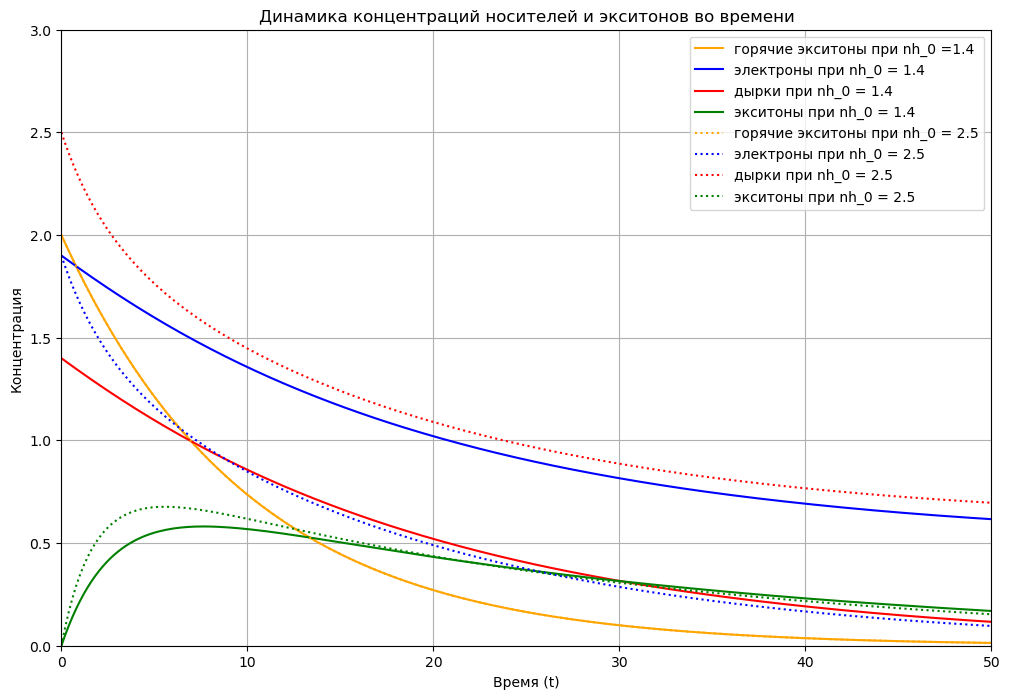

In [53]:
#Через solve_ivp (Different nh_0)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры задачи
gamma_d = 0.1      # скорость релаксации "горячих" экситонов
kappa_c = 0.1       # коэффициент взаимодействия
kappa_ex = 0.1     # коэффициент экситонного затухания
N0 = 2            # начальная концентрация горячих экситонов
ne_0 = 1.9         # начальная концентрация электронов
nh_0 = [1.4,2.5]         # начальная концентрация дырок

# Функция для расчета производных
def model(t, y, N0, gamma_d, kappa_c, kappa_ex):
    ne, nh, nx = y
    n_hot_x = N0 * np.exp(-gamma_d * t)  # Уравнение (10)
    dne_dt = gamma_d * n_hot_x - kappa_ex * ne * nh  # Уравнение (11)
    dnh_dt = dne_dt
    dnx_dt = kappa_ex * ne * nh - kappa_c * nx * (ne + nh)  # Уравнение (12)
    
    return [dne_dt, dnh_dt, dnx_dt]

# Временной массив
t_span = (0, 100)  # от 0 до 100 с
t_eval = np.linspace(0, 100, 500)  # временные точки для оценки

# Начальные условия
y0 = [[ne_0, nh_0[0], 0],[ne_0, nh_0[1], 0]]  # ne(концентрация е), nh(концентрация дырок), nx(концентрация экситонов)
#набор решений
res_x = []
for i in range(len(nh_0)):
    # Интеграция уравнений
    result = solve_ivp(model, t_span, y0[i], args=(N0, gamma_d, kappa_c, kappa_ex), t_eval=t_eval)
    res_x.append(result)
    
# Извлечение результатов
ne, nh, nx = res_x[0].y
n_hot_x = N0 * np.exp(-gamma_d * res_x[0].t)

# Извлечение результатов с измененным параметром 
ne1, nh1, nx1 = res_x[1].y
n_hot_x1 = N0 * np.exp(-gamma_d * res_x[1].t) 
# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(res_x[0].t, n_hot_x, label=f'горячие экситоны при nh_0 ={nh_0[0]}', color='orange',linestyle='-')
plt.plot(res_x[0].t, ne, label=f'электроны при nh_0 = {nh_0[0]}', color='b',linestyle='-')
plt.plot(res_x[0].t, nh, label=f'дырки при nh_0 = {nh_0[0]}', color='r',linestyle='-')
plt.plot(res_x[0].t, nx, label=f'экситоны при nh_0 = {nh_0[0]}', color='g',linestyle='-')

# Построение графиков с изменненным параметром
plt.plot(res_x[1].t, n_hot_x1, label=f'горячие экситоны при nh_0 = {nh_0[1]}', color='orange',linestyle=':')
plt.plot(res_x[1].t, ne1, label=f'электроны при nh_0 = {nh_0[1]}', color='blue',linestyle=':')
plt.plot(res_x[1].t, nh1, label=f'дырки при nh_0 = {nh_0[1]}', color='red',linestyle=':')
plt.plot(res_x[1].t, nx1, label=f'экситоны при nh_0 = {nh_0[1]}', color='green',linestyle=':')
plt.title('Динамика концентраций носителей и экситонов во времени')
plt.xlabel('Время (t)')
plt.ylabel('Концентрация')
plt.legend()
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 3)
plt.show()